In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(2*13.7,2*10.27)})
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import numpy as np
import ipywidgets as ipyw
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as ipyw
import sys
import os

# that's super ugly next time let's use setup.py to manage packages
from neptune_helper import NeptuneHelper, parse_link
import math

import qgrid
qgrid.enable()
%config InlineBackend.figure_format = 'retina'

def smooth_and_decimate(df, smoothing_window, column_to_smooth, group_by_column='experiment_id', decimate=True):
    df_ = df.copy()
    df_smooth_ = df_[[group_by_column, column_to_smooth]].groupby(group_by_column).rolling(smoothing_window).mean().reset_index()
    df_[column_to_smooth + "_smooth"] = df_smooth_[column_to_smooth]
    if decimate:
        df_ = df_[df_.x%int(smoothing_window/2)==0]
    return df_

def numbers_to_strings(df, column_name, decorator=" ."):
    df_ = df.copy()
    df_[column_name] = df[column_name].apply(lambda x: rf"{x}" + decorator)
    return df_

In [2]:
organization = "pmtest"
# project = "football"
project = "football"
helper = NeptuneHelper(organization, project)

In [3]:
experiment_tag = "gracious_davinci"
params = helper.get_parameters_for_experiments(tags=experiment_tag)
params.columns

Index(['convnet_mnist.activation', 'convnet_mnist.d_conv',
       'convnet_mnist.d_ff', 'convnet_mnist.n_conv_layers',
       'convnet_mnist.output_activation', 'DeterministicMCTSAgent.avoid_loops',
       'DeterministicMCTSAgent.gamma', 'DeterministicMCTSAgent.n_passes',
       'DeterministicMCTSAgent.value_traits_class',
       'DeterministicMCTSAgent.value_accumulator_class', 'KerasNetwork.loss',
       'KerasNetwork.loss_weights', 'KerasNetwork.metrics',
       'KerasNetwork.model_fn', 'KerasNetwork.optimizer',
       'KerasNetwork.train_callbacks', 'KerasNetwork.weight_decay',
       'Runner.agent_class', 'Runner.batch_stepper_class', 'Runner.env_class',
       'Runner.episode_time_limit', 'Runner.n_envs', 'Runner.n_epochs',
       'Runner.n_precollect_epochs', 'Runner.network_class',
       'Runner.trainer_class', 'Runner.network_resume_checkpoint_path',
       'ScalarValueTraits.dead_end_value', 'Sokoban.dim_room',
       'Sokoban.max_steps', 'Sokoban.num_boxes', 'Sokoban.penalt

In [4]:
relevant_parameters = ["DeterministicMCTSAgent.max_search_depth", "DeterministicMCTSAgent.n_passes"]
channels = ["episode/solved_rate", "agent/search_depth_mean", "agent/total_n_passes_mean"]

In [5]:
return_means = helper.get_channel_for_experiments(experiment_tag, channels, final_values_only=False, 
                                               parameters_to_add=relevant_parameters, drop_x_channel=False)


In [6]:
return_means

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
summary = return_means.groupby('experiment_id').mean().drop('x', axis=1)
summary

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [32]:
summary[(summary["DeterministicMCTSAgent.max_search_depth"]>=8) & (summary["DeterministicMCTSAgent.n_passes"]>=8)]

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

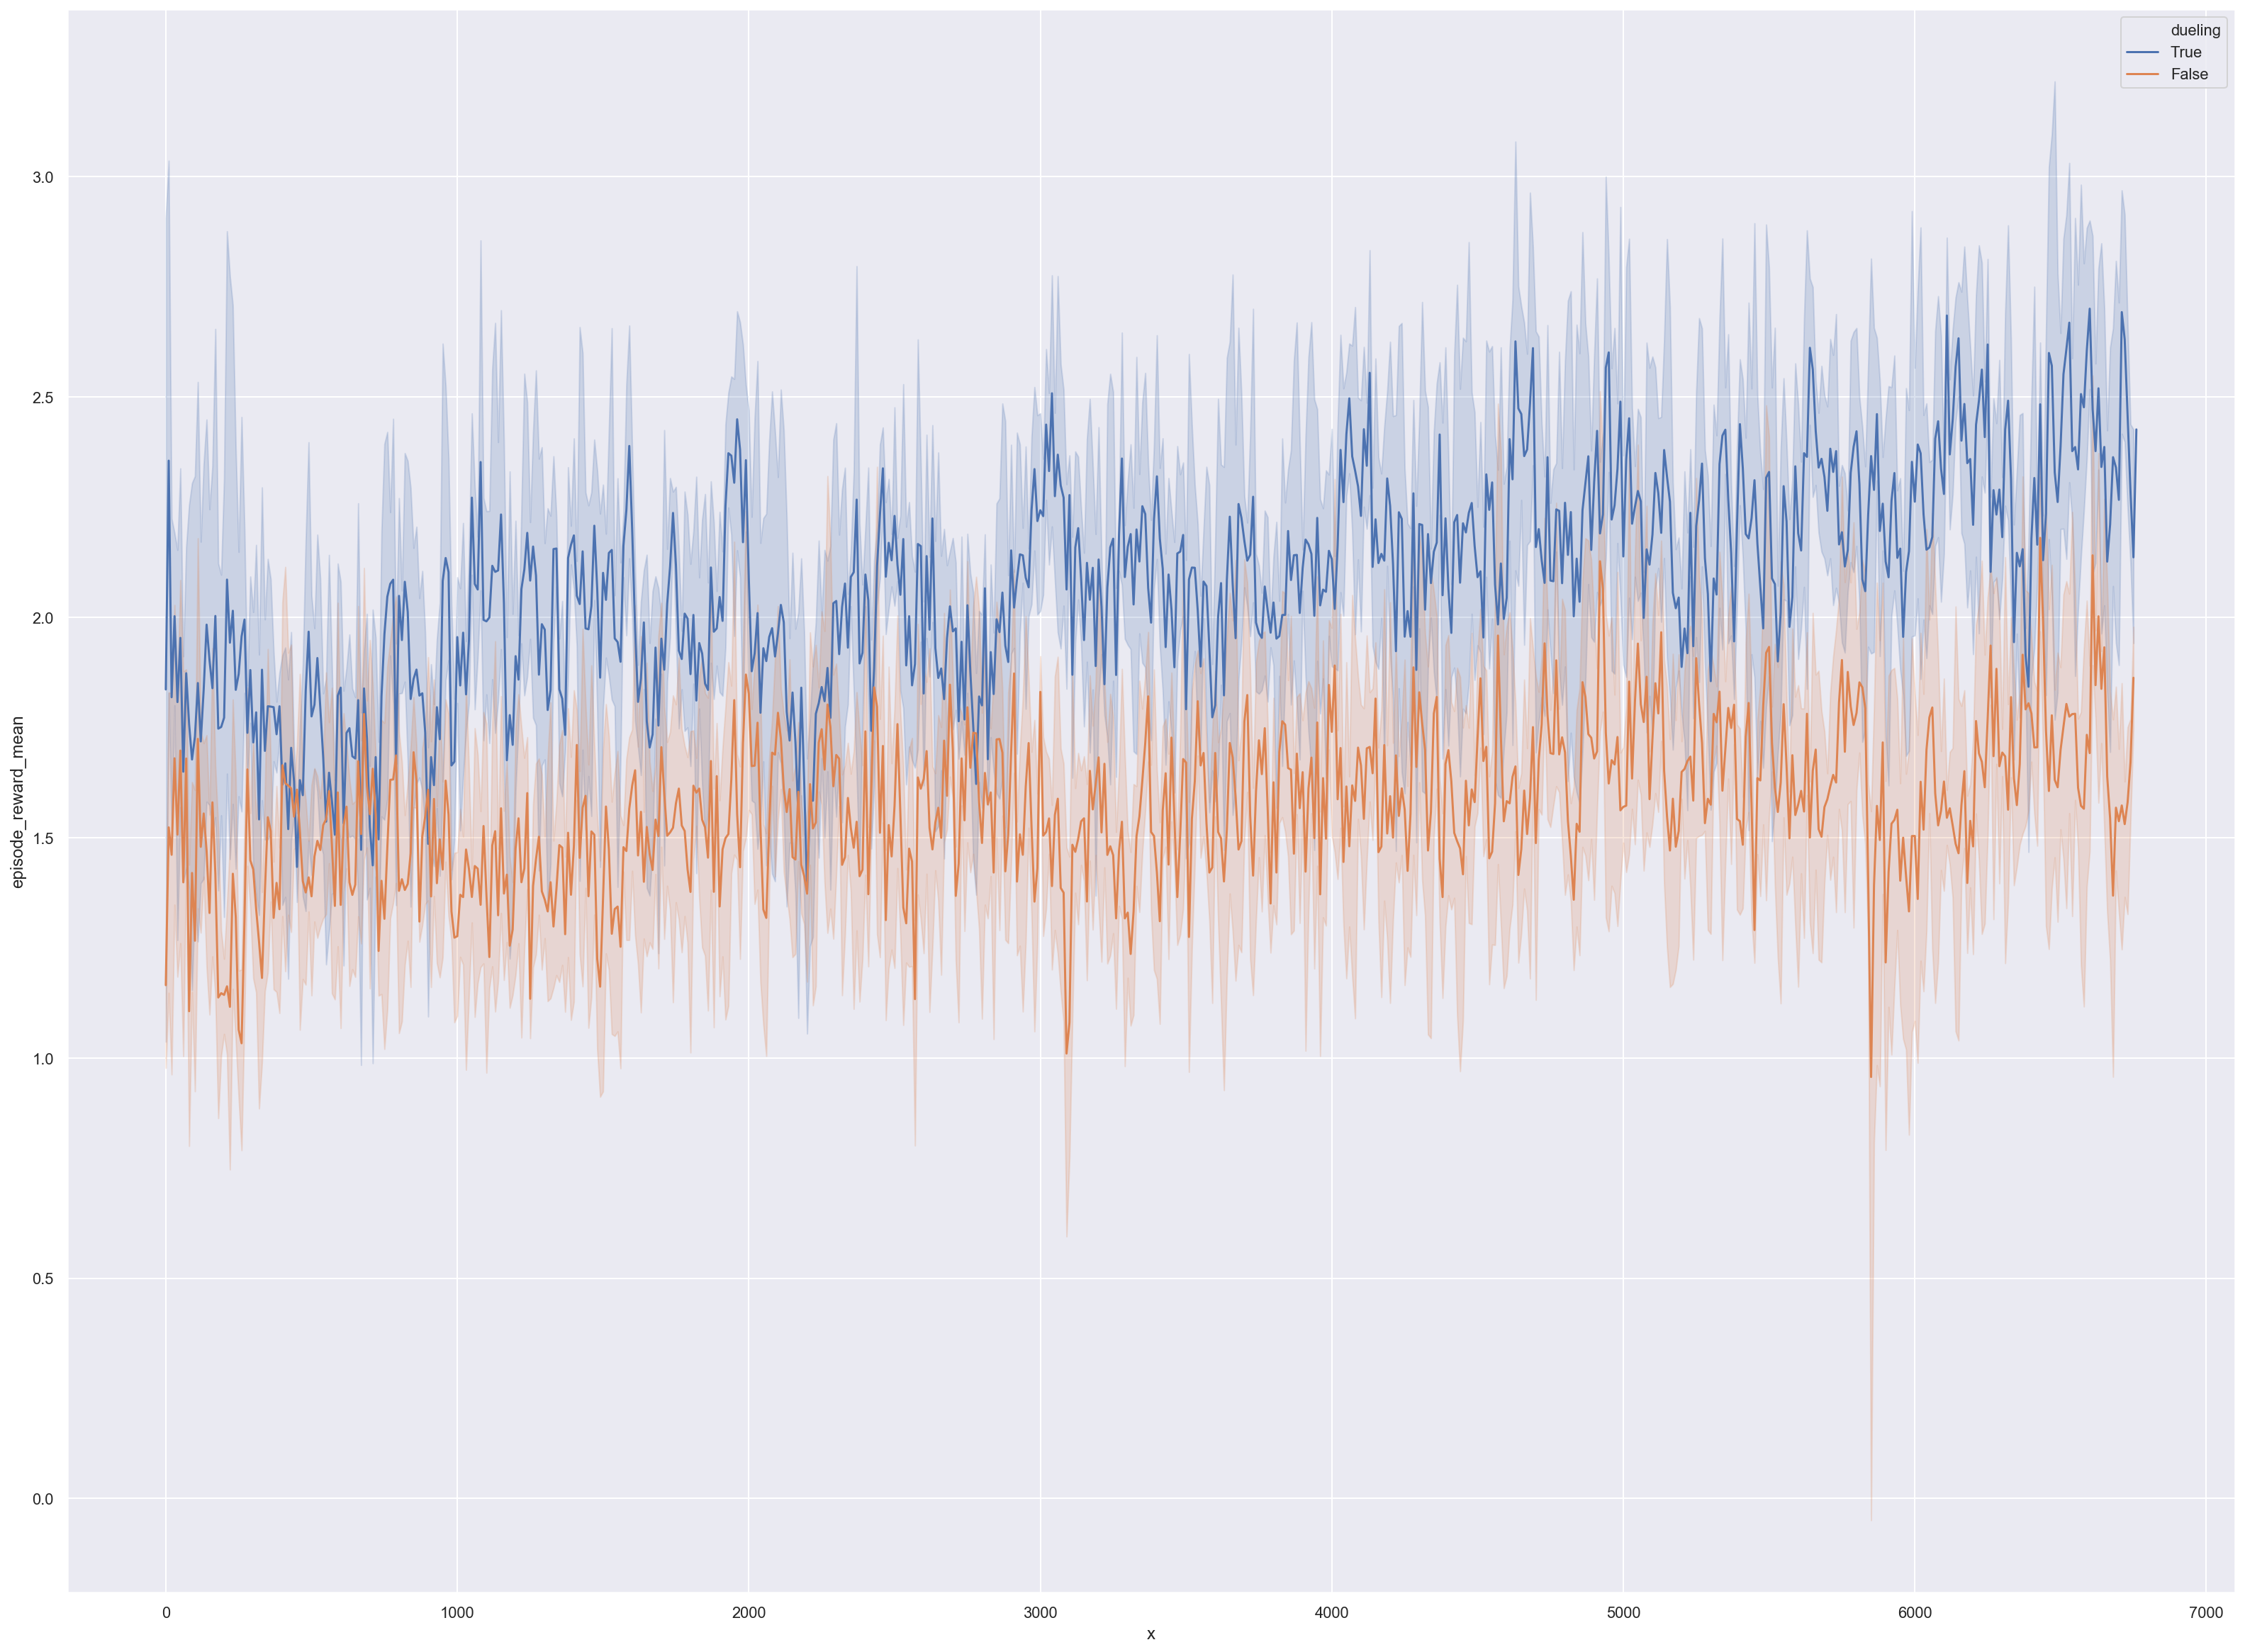

In [48]:
return_means.groupby("experiment_id").apply(lambda x:np.std(x)/math.sqrt(len(x)))
return_means.groupby("experiment_id").mean()
# return_means.groupby(['ShootingAgent.rollout_time_limit', 'SoftmaxAgent.temperature']).mean()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [54]:
festive_allen_105['noptepochs_']=festive_allen_105['noptepochs'].apply(lambda x: rf"{x}_ ")

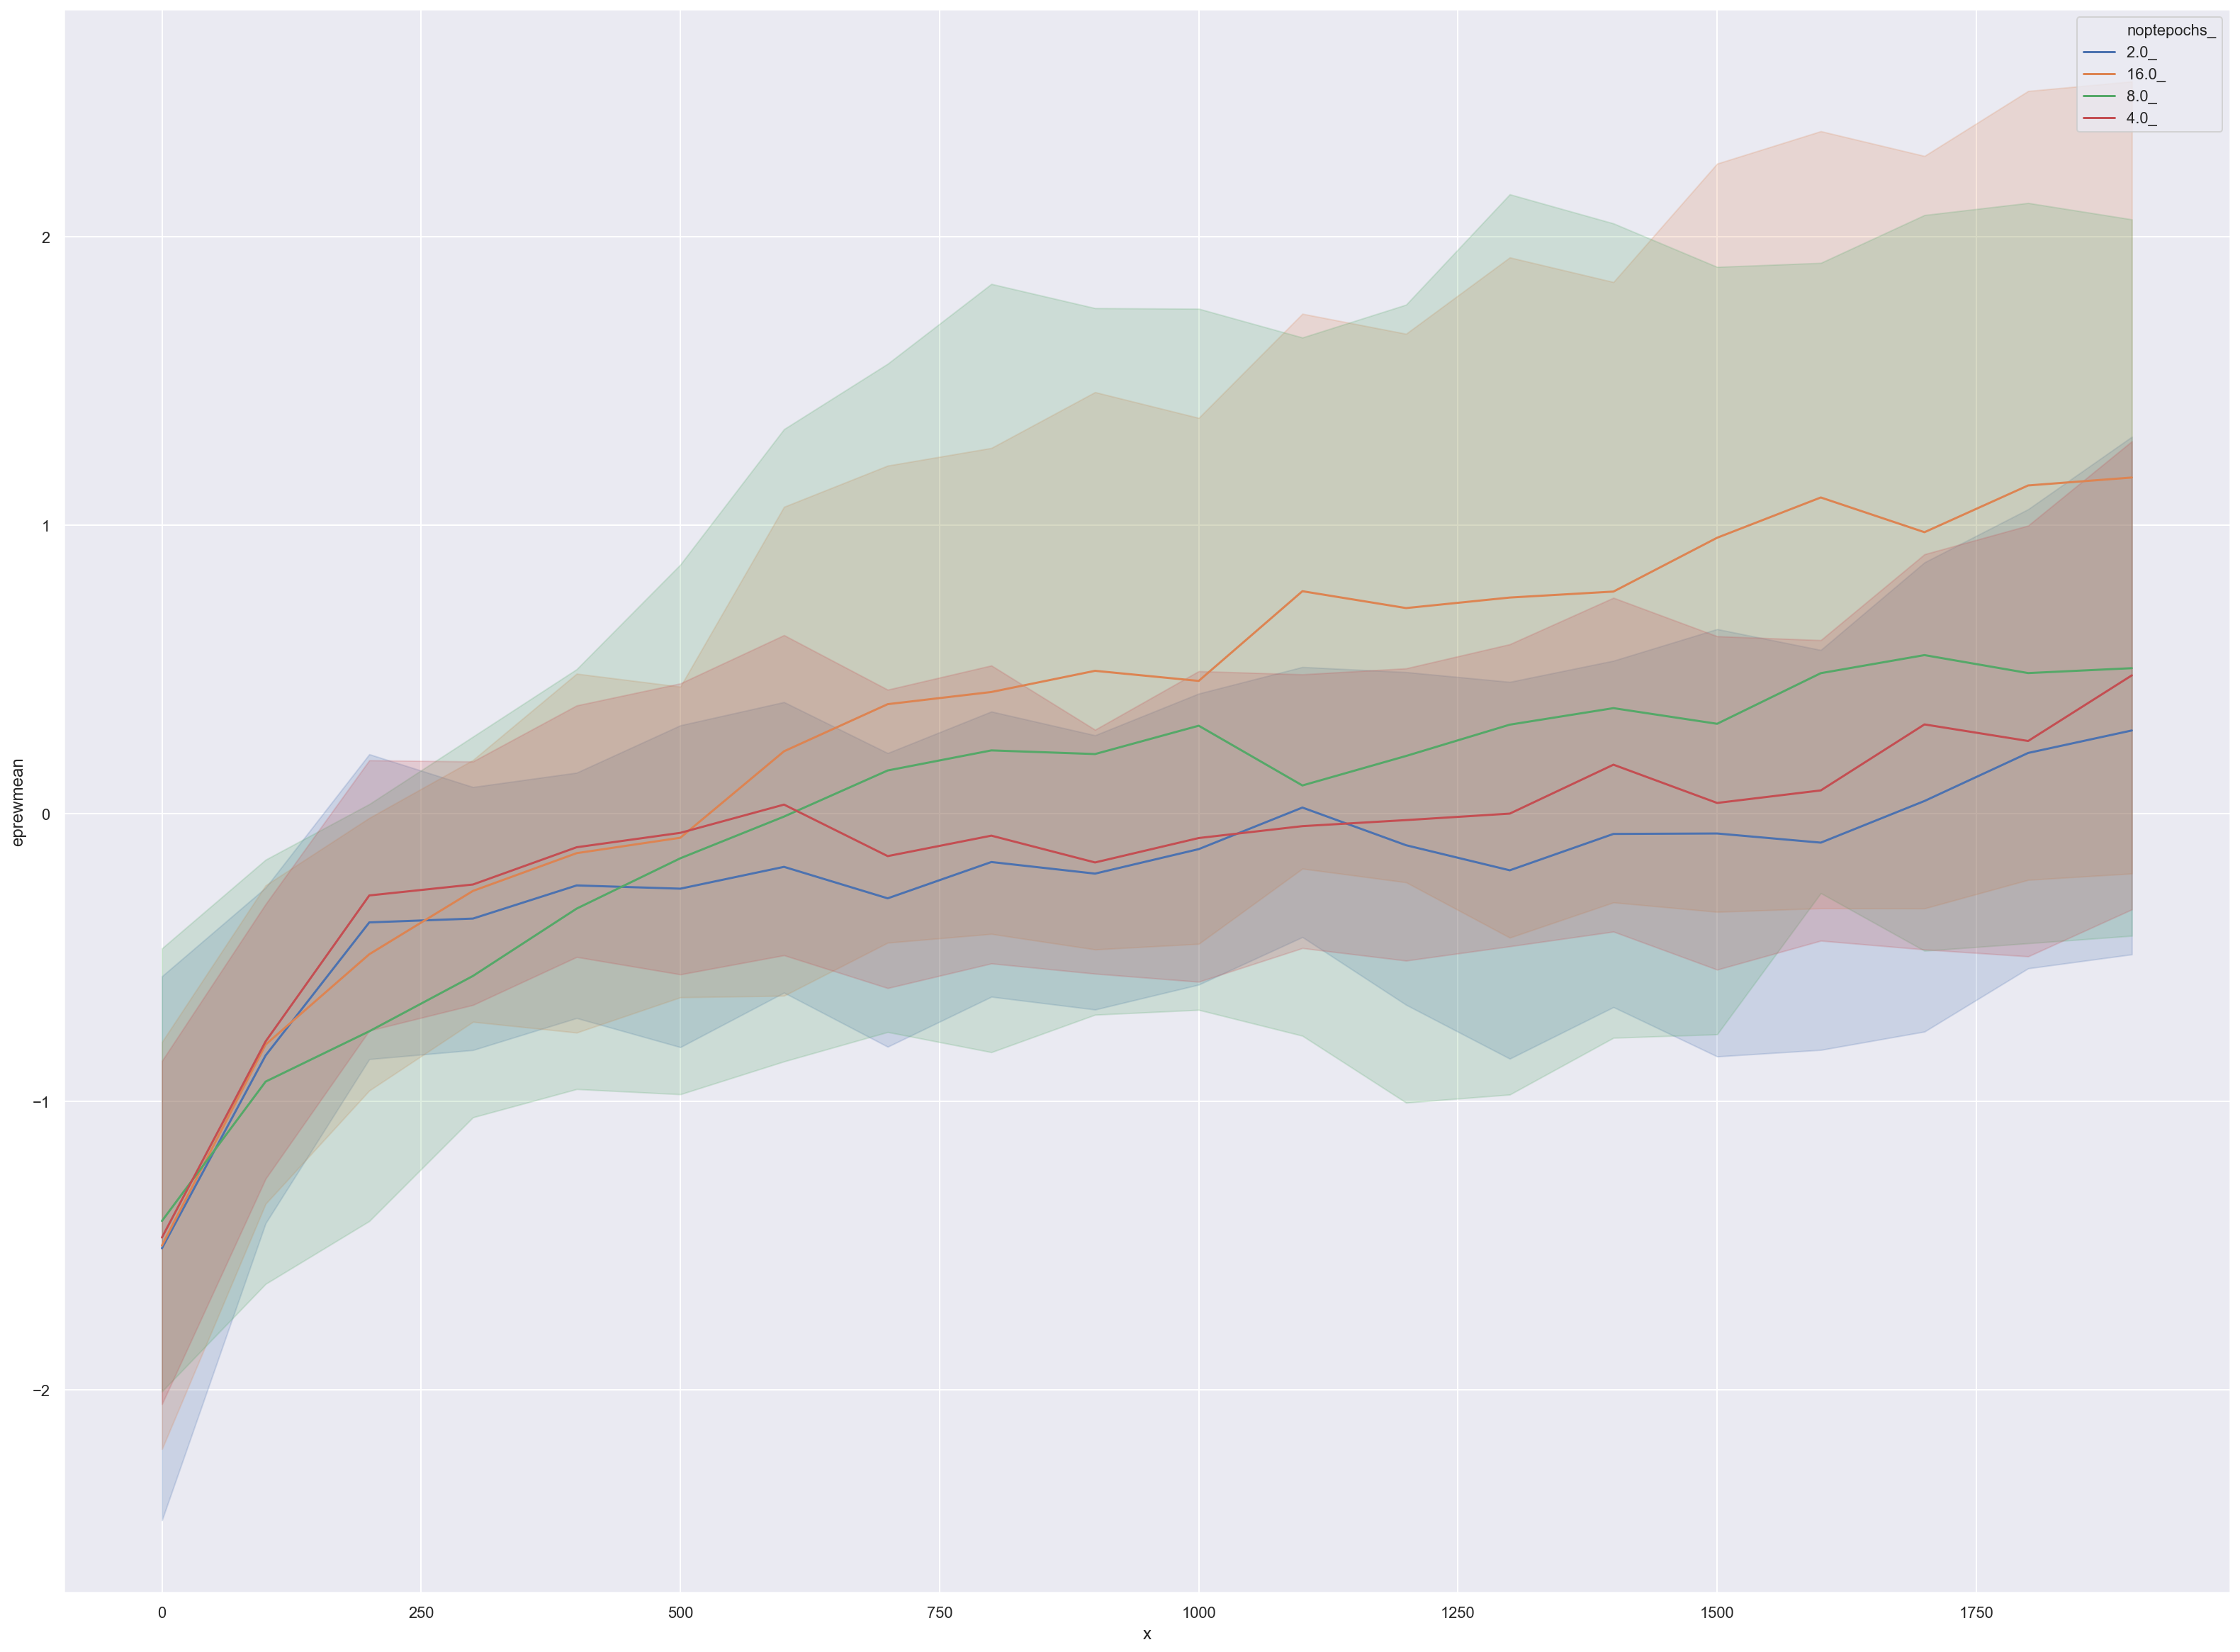

In [55]:
data_ = festive_allen_105 #[elated_goldstine_108['interactive_mlp.p_num_hidden_']==4]
data_ = data_[data_.x%100==0]
data_ = data_[data_.x<2000]
sns.lineplot(x="x", y="eprewmean", data=data_, hue='noptepochs_')

In [56]:
experiment_tag = "fervent_sammet"
win_rates = helper.get_channel_for_experiments(experiment_tag, channels, final_values_only=False, 
                                               parameters_to_add=relevant_parameters, drop_x_channel=False)
fervent_sammet_103 = win_rates
del win_rates

error downloading data from: Experiment(FOOT-186)  skipping


In [57]:
best_105 = festive_allen_105[festive_allen_105.noptepochs==16]
best_103 = fervent_sammet_103[fervent_sammet_103.reward_experiment=="scoring,checkpoints"]

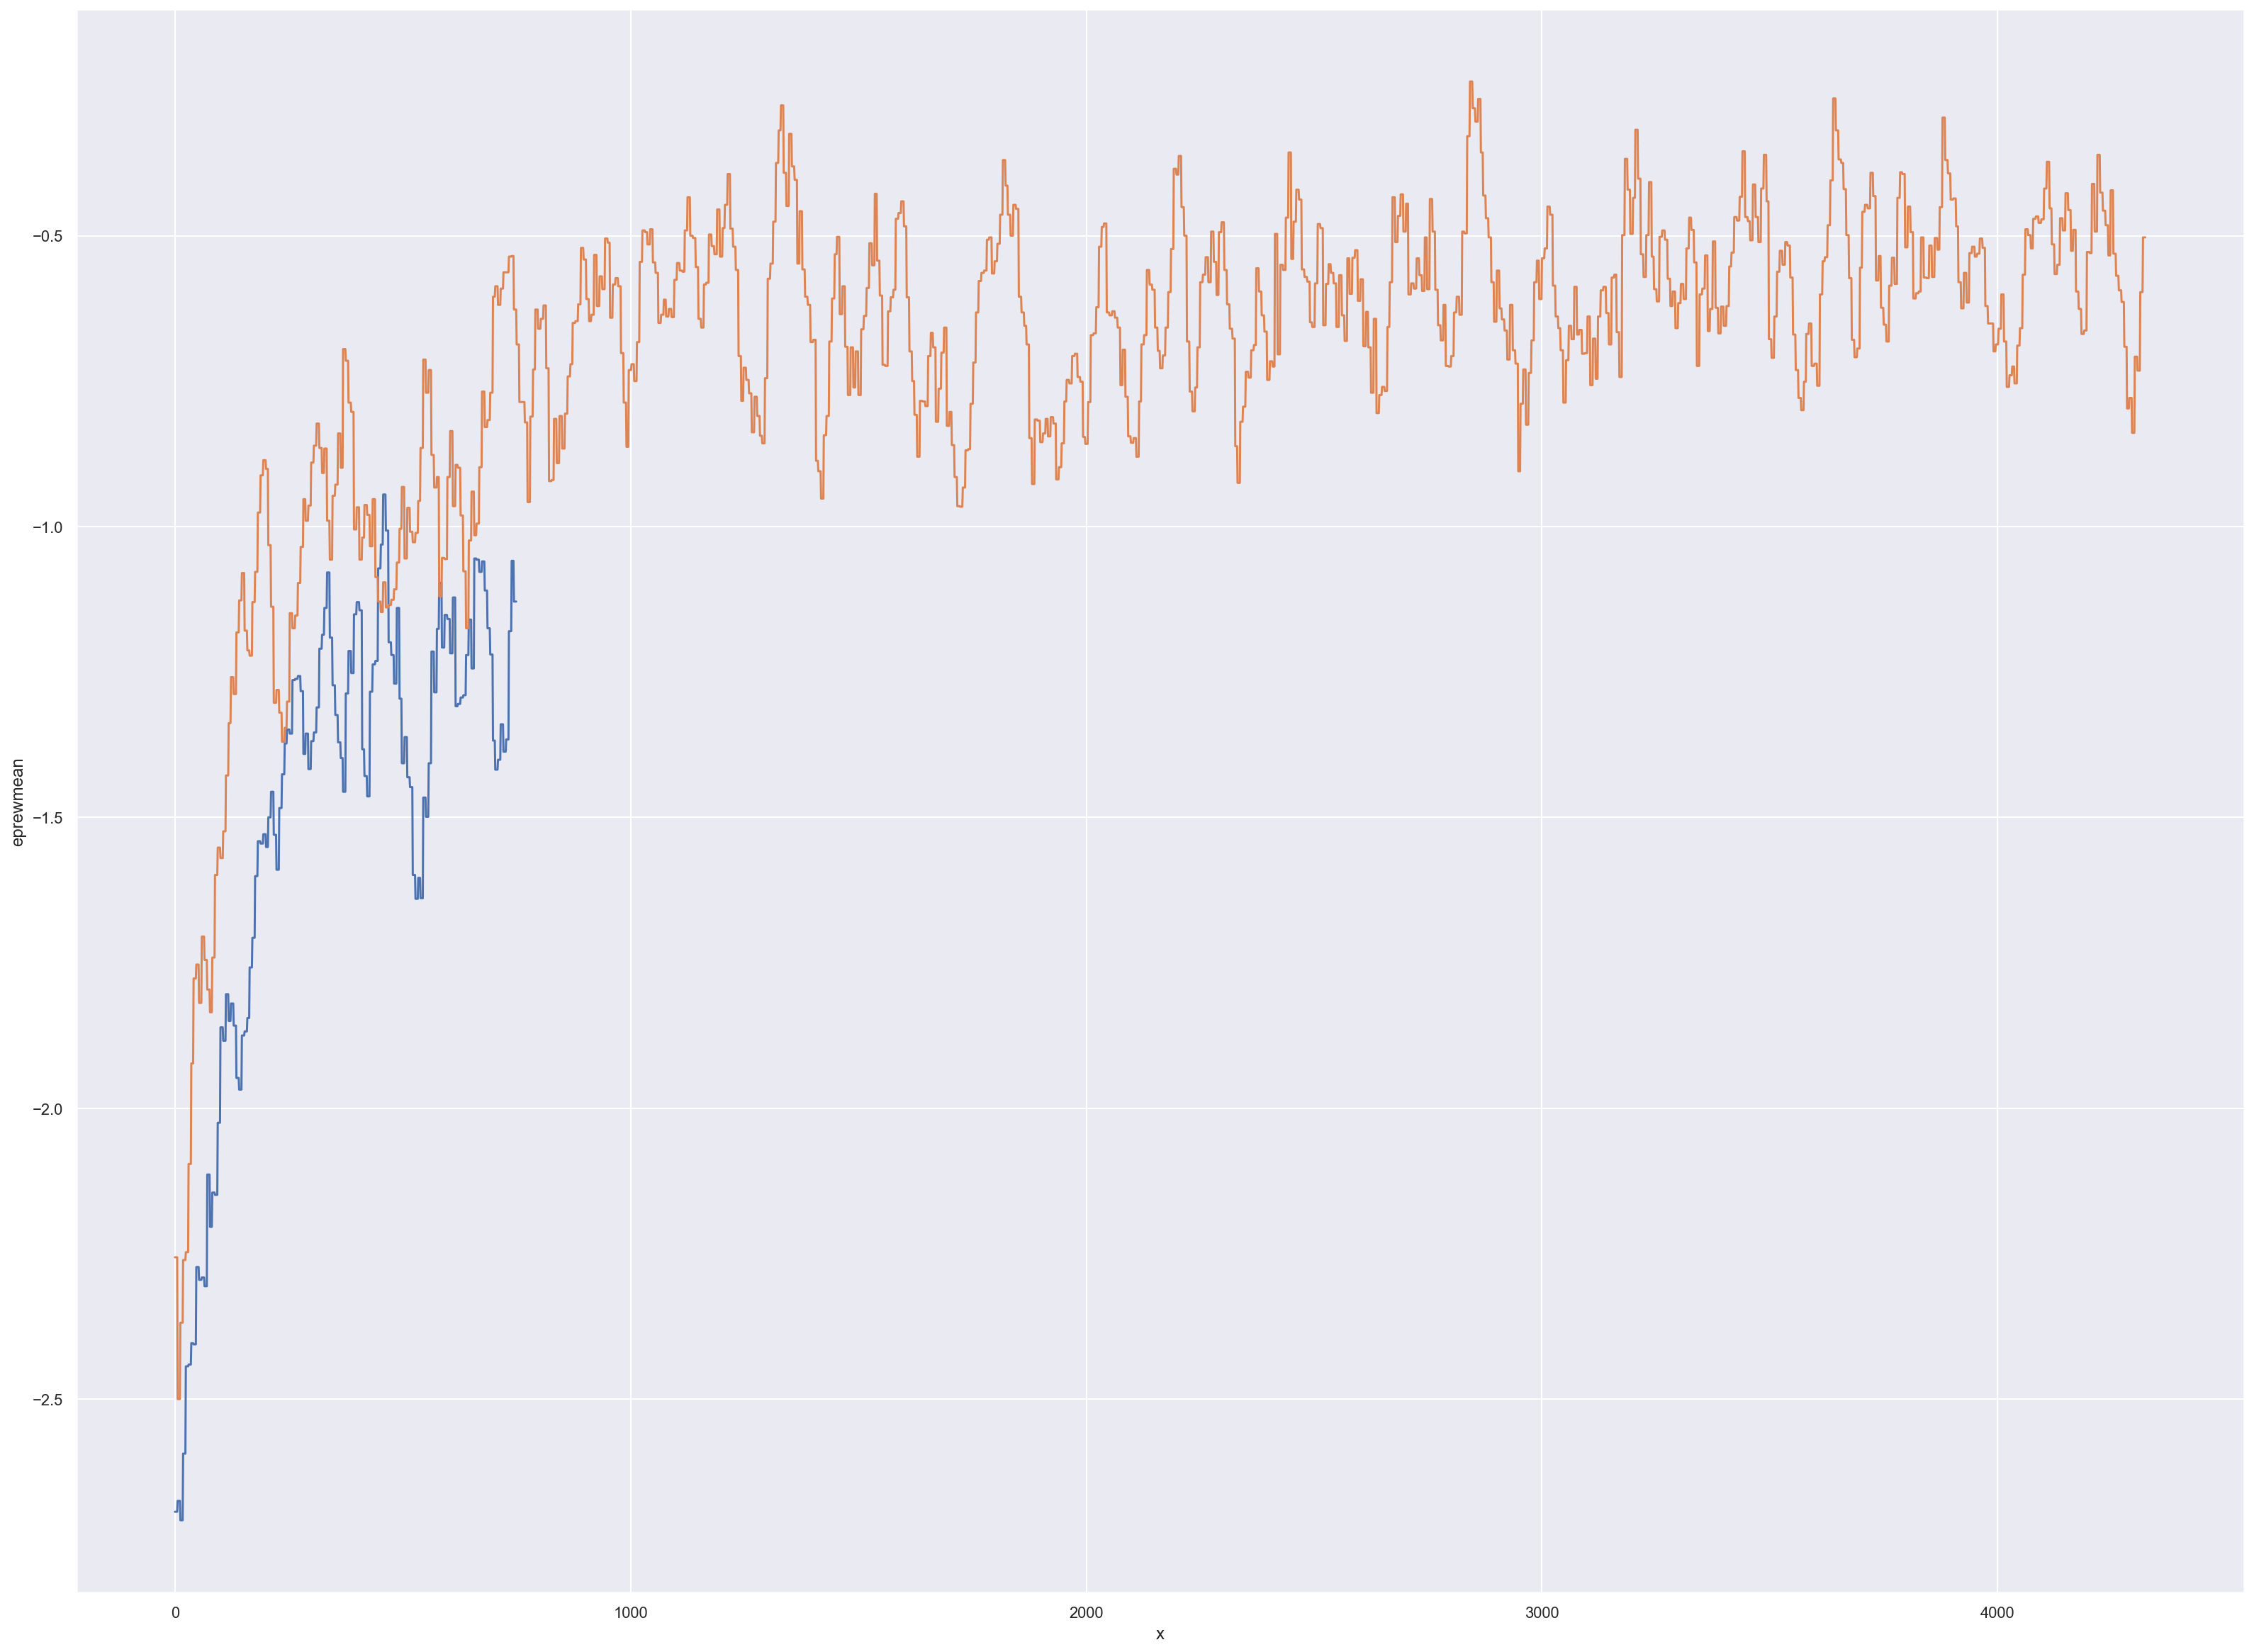

In [63]:
level_name = "11_vs_11_hard_stochastic"
data_ = best_103[best_103.level==level_name]
sns.lineplot(x="x", y="eprewmean", data=data_)
data_ = best_105[best_105.level==level_name]
sns.lineplot(x="x", y="eprewmean", data=data_)
del data_